# Predicting the Stock Maret Prices
Using Linear Regression methods, VWAP values for Reliance are to be predicted from the past stock market Dataset and then it can be used to calculate the accuracy of the models used

## Methods used :
- Simple Linear Regression
- Gradient Boost Method
- XGBoost Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("RELIANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [3]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5204.000000,5.204000e+03,5.204000e+03,2.354000e+03,4.690000e+03,4690.000000
mean,991.573146,993.152488,1007.210386,977.650846,991.744716,991.899193,992.505048,5.477416e+06,5.766197e+14,1.383930e+05,2.240034e+06,0.436304
std,559.193166,560.779485,570.274651,548.810030,559.142833,559.245468,559.404639,4.939589e+06,8.067358e+14,1.261135e+05,1.861371e+06,0.145547
min,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,564.125000,565.987500,574.575000,555.350000,563.825000,564.600000,563.172500,2.818465e+06,2.172170e+14,7.120650e+04,1.178495e+06,0.322925
50%,929.400000,930.975000,941.675000,920.000000,929.550000,929.600000,930.265000,4.153304e+06,3.597578e+14,9.841550e+04,1.784206e+06,0.452250
75%,1210.675000,1211.000000,1231.662500,1193.075000,1213.550000,1210.750000,1211.957500,6.424490e+06,6.388226e+14,1.559138e+05,2.685708e+06,0.546275
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473434e+16,1.428490e+06,3.495888e+07,0.978300


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5204 non-null   object 
 1   Symbol              5204 non-null   object 
 2   Series              5204 non-null   object 
 3   Prev Close          5204 non-null   float64
 4   Open                5204 non-null   float64
 5   High                5204 non-null   float64
 6   Low                 5204 non-null   float64
 7   Last                5204 non-null   float64
 8   Close               5204 non-null   float64
 9   VWAP                5204 non-null   float64
 10  Volume              5204 non-null   int64  
 11  Turnover            5204 non-null   float64
 12  Trades              2354 non-null   float64
 13  Deliverable Volume  4690 non-null   float64
 14  %Deliverble         4690 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 610.0

In [5]:
import seaborn as sns

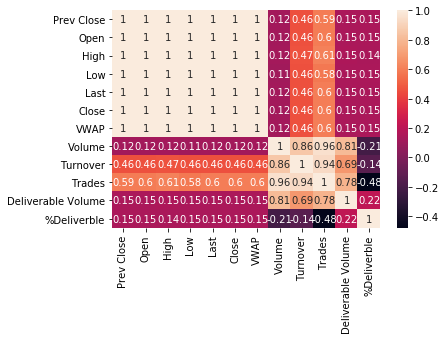

In [6]:
sns.heatmap(df.corr(), annot=True)

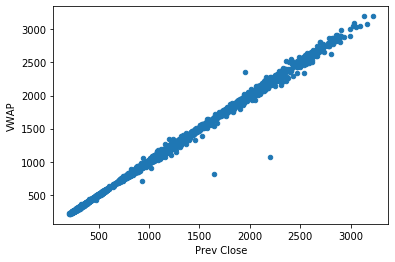

In [7]:
df.plot(x="Prev Close", y="VWAP", kind="scatter")

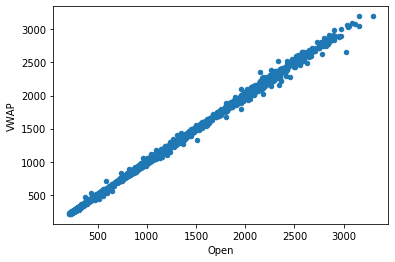

In [8]:
df.plot(x="Open", y="VWAP", kind="scatter")

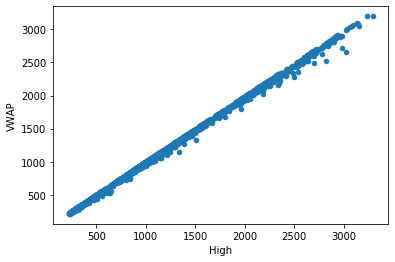

In [9]:
df.plot(x="High", y="VWAP", kind="scatter")

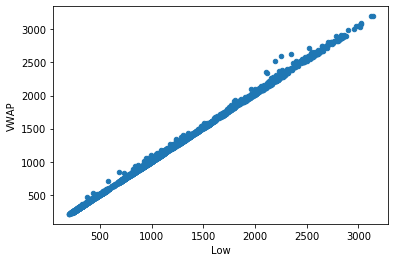

In [10]:
df.plot(x="Low", y="VWAP", kind="scatter")

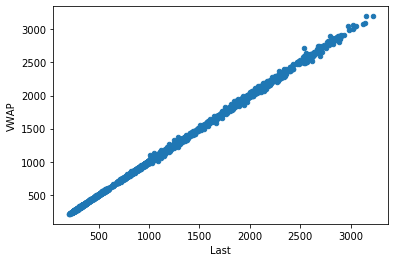

In [11]:
df.plot(x="Last", y="VWAP", kind="scatter")

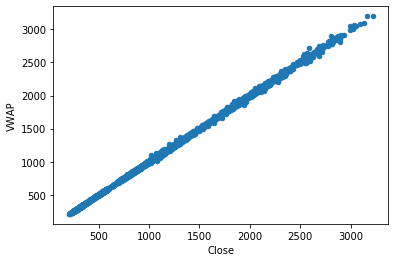

In [12]:
df.plot(x="Close", y="VWAP", kind="scatter")

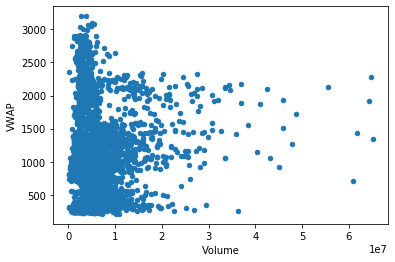

In [13]:
df.plot(x="Volume", y="VWAP", kind="scatter")

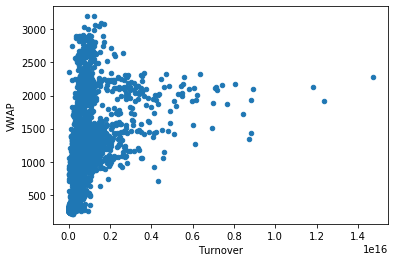

In [14]:
df.plot(x="Turnover", y="VWAP", kind="scatter")

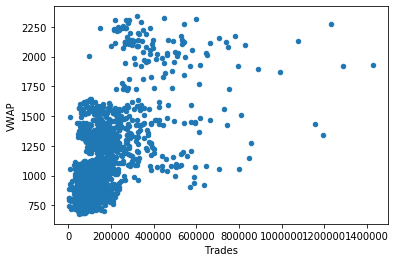

In [15]:
df.plot(x="Trades", y="VWAP", kind="scatter")

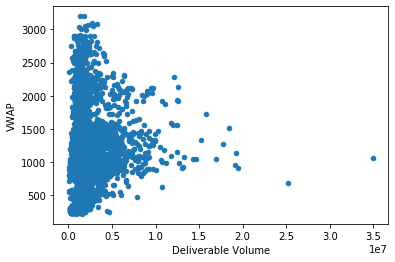

In [16]:
df.plot(x="Deliverable Volume", y="VWAP", kind="scatter")

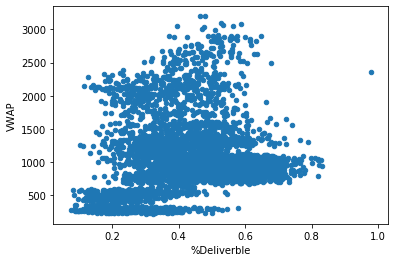

In [17]:
df.plot(x="%Deliverble", y="VWAP", kind="scatter")

In [18]:
X = df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'Volume']].values
y = df['VWAP'].values

In [19]:
X

array([[2.3305000e+02, 2.3750000e+02, 2.5170000e+02, ..., 2.5170000e+02,
        2.5170000e+02, 4.4564240e+06],
       [2.5170000e+02, 2.5840000e+02, 2.7185000e+02, ..., 2.7185000e+02,
        2.7185000e+02, 9.4878780e+06],
       [2.7185000e+02, 2.5665000e+02, 2.8790000e+02, ..., 2.8675000e+02,
        2.8250000e+02, 2.6833684e+07],
       ...,
       [1.9640500e+03, 1.9800000e+03, 1.9929500e+03, ..., 1.9475000e+03,
        1.9478000e+03, 1.5062376e+07],
       [1.9478000e+03, 1.9530500e+03, 1.9650000e+03, ..., 1.9570000e+03,
        1.9526000e+03, 1.1924527e+07],
       [1.9526000e+03, 1.9405000e+03, 1.9561000e+03, ..., 1.9405000e+03,
        1.9298000e+03, 2.1845931e+07]])

In [20]:
y

array([ 249.37,  263.52,  274.79, ..., 1969.06, 1946.67, 1935.45])

## Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(model.coef_)

[ 3.21869653e-02  9.13386740e-03  3.26257168e-01  3.06117161e-01
 -1.93619338e-01  5.19864037e-01  5.43123054e-08]


In [24]:
print(model.intercept_)

-0.24217219778699928


In [25]:
Lr_score = model.score(X_test, y_test)
Lr_score

0.9998911719280495

## Gradient Boosting

In [26]:
from sklearn import ensemble
gboost = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate=0.1)
gboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
Gboost_score = gboost.score(X_test, y_test)
Gboost_score

0.9998414296264052

## XGBoost Regression

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [29]:
xgb = XGBRegressor()
print(xgb)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)


In [30]:
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

0.9999825302519482

In [31]:
XGBoost_score = xgb.score(X_test,y_test)
XGBoost_score

0.999698656511367

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
y_predicted = xgb.predict(X_test)
y_predicted

array([1130.7208 , 1333.3158 ,  701.45294, ..., 1012.57697, 1184.3407 ,
        458.76157], dtype=float32)

In [34]:
mse = mean_squared_error(y_test, y_predicted)
print("MSE : ", mse)

MSE :  96.70032678367656


Text(0, 0.5, 'Predicted VWAP')

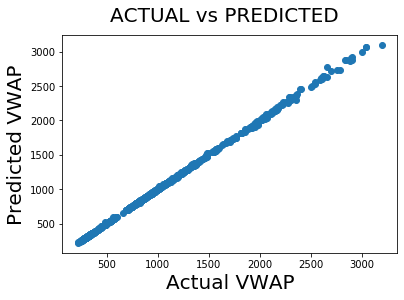

In [35]:
fig = plt.figure()
plt.scatter(y_test, y_predicted)
fig.suptitle('ACTUAL vs PREDICTED',fontsize=20)   
plt.xlabel('Actual VWAP', fontsize=20)                         
plt.ylabel('Predicted VWAP', fontsize=20)

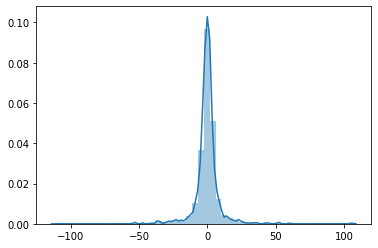

In [36]:
sns.distplot((y_test-y_predicted),bins=50);

In [37]:
print("Linear Regression Accuracy : ", Lr_score)
print("Gradient Boost Regression Accuracy : ", Gboost_score)
print("XGBoost Regression Accuracy : ", XGBoost_score)

Linear Regression Accuracy :  0.9998911719280495
Gradient Boost Regression Accuracy :  0.9998414296264052
XGBoost Regression Accuracy :  0.999698656511367
